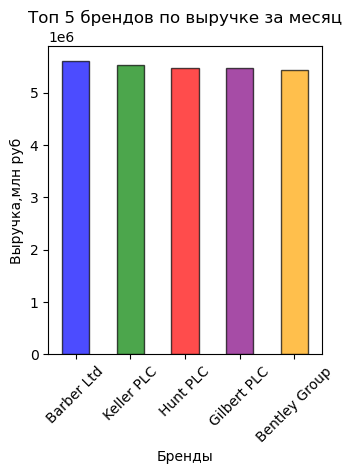

Товар с высокой выручкой
      TOTAL_REV_S  AVG_MARGINALITY_S
SKU                                 
1512    322638.55           31.83452 

Товар с высокой маржинальностью
      TOTAL_REV_S  AVG_MARGINALITY_S
SKU                                 
2534    162056.21          37.076233 

Бренд с высокой маржинальностью
                          TOTAL_REV  AVG_MARGINALITY
BRAND                                               
Alexander, May and Jones  227087.39        33.385466 

       ORDNUM      DT_ORD   CUST_ID   SKU                       BRAND  \
0  EE00000001  01.04.2025  er-72880    65                Schwartz Inc   
1  EE00000001  01.04.2025  er-72880  5472  Anderson, Butler and Kelly   
2  EE00000001  01.04.2025  er-72880  6694                   Evans Ltd   
3  EE00000001  01.04.2025  er-72880  4544           Williams and Sons   
4  EE00000001  01.04.2025  er-72880  2453    Ellis, Adams and Collins   

   ORIG_SUM  SALE_SUM  COST_SUM_WO_TAX     TAX  QUANTITY  revenue  margin  \
0    940

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('data_sales.csv',sep=';')

# Просмотр первых строк данных
df.head()

# Добавим колонку с выручкой
df['revenue'] = df['SALE_SUM'] * df['QUANTITY']

# Добавим колонку с маржой
df['margin']=df['SALE_SUM']-df['COST_SUM_WO_TAX']-df['TAX']

# Добавим колонку с маржинальностьюм
df['marginality']=df['margin']/(df['SALE_SUM']-df['TAX'])*100

# Группировка по брендам
brand_revenue = df.groupby('BRAND').agg(
    TOTAL_REV=('revenue', 'sum'),
    AVG_MARGINALITY=('marginality', 'mean')
)

brand_revenue_starts=brand_revenue.sort_values('TOTAL_REV', ascending=False)

brand_revenue_top5=brand_revenue_starts.head(5)

brand_margin_starts=brand_revenue.sort_values('AVG_MARGINALITY', ascending=False).head(1)

# Группировка по SKU
sku_revenue = df.groupby('SKU').agg(
    TOTAL_REV_S=('revenue', 'sum'),
    AVG_MARGINALITY_S=('marginality', 'mean')
)

sku_revenue_starts=sku_revenue.sort_values('TOTAL_REV_S', ascending=False)

sku_marginality_1=sku_revenue.sort_values('AVG_MARGINALITY_S', ascending=False).head(1)

# Визуализация
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
brand_revenue_top5['TOTAL_REV'].plot(kind='bar', color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7, edgecolor='black')
plt.title('Топ 5 брендов по выручке за месяц')
plt.xlabel('Бренды')
plt.ylabel('Выручка,млн руб')
plt.xticks(rotation=45)
plt.show()

print("Товар с высокой выручкой")
print(sku_revenue_starts.head(1), "\n")

print("Товар с высокой маржинальностью")
print(sku_marginality_1, "\n")

print("Бренд с высокой маржинальностью")
print(brand_margin_starts, "\n")

print(df.head())
